In [6]:
import numpy as np
from skimage.transform import resize
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Conv2D, ConvLSTM2D, TimeDistributed
from sklearn.externals import joblib
import pylidc as pl

from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
image_size = (256, 256)
num_slices = 50

In [5]:
unet = load_model('unet.hdf5')
lstm = load_model('unet_lstm.hdf5')

ResourceExhaustedError: OOM when allocating tensor with shape[3,3,1024,1024] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: conv2d_10/kernel/Assign = Assign[T=DT_FLOAT, _class=["loc:@conv2d_10/kernel"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](conv2d_10/kernel, conv2d_10/random_uniform)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Caused by op 'conv2d_10/kernel/Assign', defined at:
  File "/usr/share/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/share/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/share/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/share/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/share/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/usr/share/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/usr/share/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/usr/share/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/share/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/share/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/share/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/share/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/share/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/share/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/share/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/usr/share/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/share/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/share/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/share/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/share/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-a30ae0860bbe>", line 1, in <module>
    unet = load_model('unet.hdf5')
  File "/usr/share/anaconda3/lib/python3.6/site-packages/keras/models.py", line 243, in load_model
    model = model_from_config(model_config, custom_objects=custom_objects)
  File "/usr/share/anaconda3/lib/python3.6/site-packages/keras/models.py", line 317, in model_from_config
    return layer_module.deserialize(config, custom_objects=custom_objects)
  File "/usr/share/anaconda3/lib/python3.6/site-packages/keras/layers/__init__.py", line 55, in deserialize
    printable_module_name='layer')
  File "/usr/share/anaconda3/lib/python3.6/site-packages/keras/utils/generic_utils.py", line 144, in deserialize_keras_object
    list(custom_objects.items())))
  File "/usr/share/anaconda3/lib/python3.6/site-packages/keras/engine/topology.py", line 2520, in from_config
    process_node(layer, node_data)
  File "/usr/share/anaconda3/lib/python3.6/site-packages/keras/engine/topology.py", line 2477, in process_node
    layer(input_tensors[0], **kwargs)
  File "/usr/share/anaconda3/lib/python3.6/site-packages/keras/engine/topology.py", line 590, in __call__
    self.build(input_shapes[0])
  File "/usr/share/anaconda3/lib/python3.6/site-packages/keras/layers/convolutional.py", line 138, in build
    constraint=self.kernel_constraint)
  File "/usr/share/anaconda3/lib/python3.6/site-packages/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/usr/share/anaconda3/lib/python3.6/site-packages/keras/engine/topology.py", line 414, in add_weight
    constraint=constraint)
  File "/usr/share/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 392, in variable
    v = tf.Variable(value, dtype=tf.as_dtype(dtype), name=name)
  File "/usr/share/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 229, in __init__
    constraint=constraint)
  File "/usr/share/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 366, in _init_from_args
    validate_shape=validate_shape).op
  File "/usr/share/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/state_ops.py", line 276, in assign
    validate_shape=validate_shape)
  File "/usr/share/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_state_ops.py", line 59, in assign
    use_locking=use_locking, name=name)
  File "/usr/share/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/usr/share/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3160, in create_op
    op_def=op_def)
  File "/usr/share/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1625, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[3,3,1024,1024] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: conv2d_10/kernel/Assign = Assign[T=DT_FLOAT, _class=["loc:@conv2d_10/kernel"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](conv2d_10/kernel, conv2d_10/random_uniform)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.



In [ ]:
scans = pl.query(pl.Scan)
n = scans.count()

In [ ]:
test = joblib.load('test_set.p')
train = list(set(range(n)) - set(test))

In [ ]:
def get_data_unet(i):
    scan = scans[i]
    images = scan.load_all_dicom_images(verbose=False)
    n = len(images)
    X = np.array([resize(im.pixel_array, image_size, mode='constant') for im in images])
    X = np.expand_dims(X, axis=-1)
    y = np.zeros((512, 512, n))
    for ann in scan.annotations:
        b = ann.bbox()
        y[b] = np.logical_or(y[b], ann.boolean_mask())
    y = np.rollaxis(y, 2, 0)
    y = resize(y, (n, *image_size), mode='constant')
    y = np.expand_dims(y, axis=-1)
    start = np.random.randint(n - num_slices)
    X = X[start:start + num_slices]
    y = y[start:start + num_slices]
    return unet.predict(X, batch_size=1)[None], y[None]

In [ ]:
# evaluate lstm vs unet
X, y = get_data_unet(np.random.choice(test))
preds_unet = X
fpr_unet, tpr_unet, _ = roc_curve(np.rint(y).flatten(), preds_unet.flatten())

preds_lstm = lstm.predict(preds_unet, batch_size=1)
fpr_lstm, tpr_lstm, _ = roc_curve(np.rint(y).flatten(), preds_lstm.flatten())

In [ ]:
print(auc(fpr_unet, tpr_unet))
print(auc(fpr_lstm, tpr_lstm))

/usr/share/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(0, 49 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until


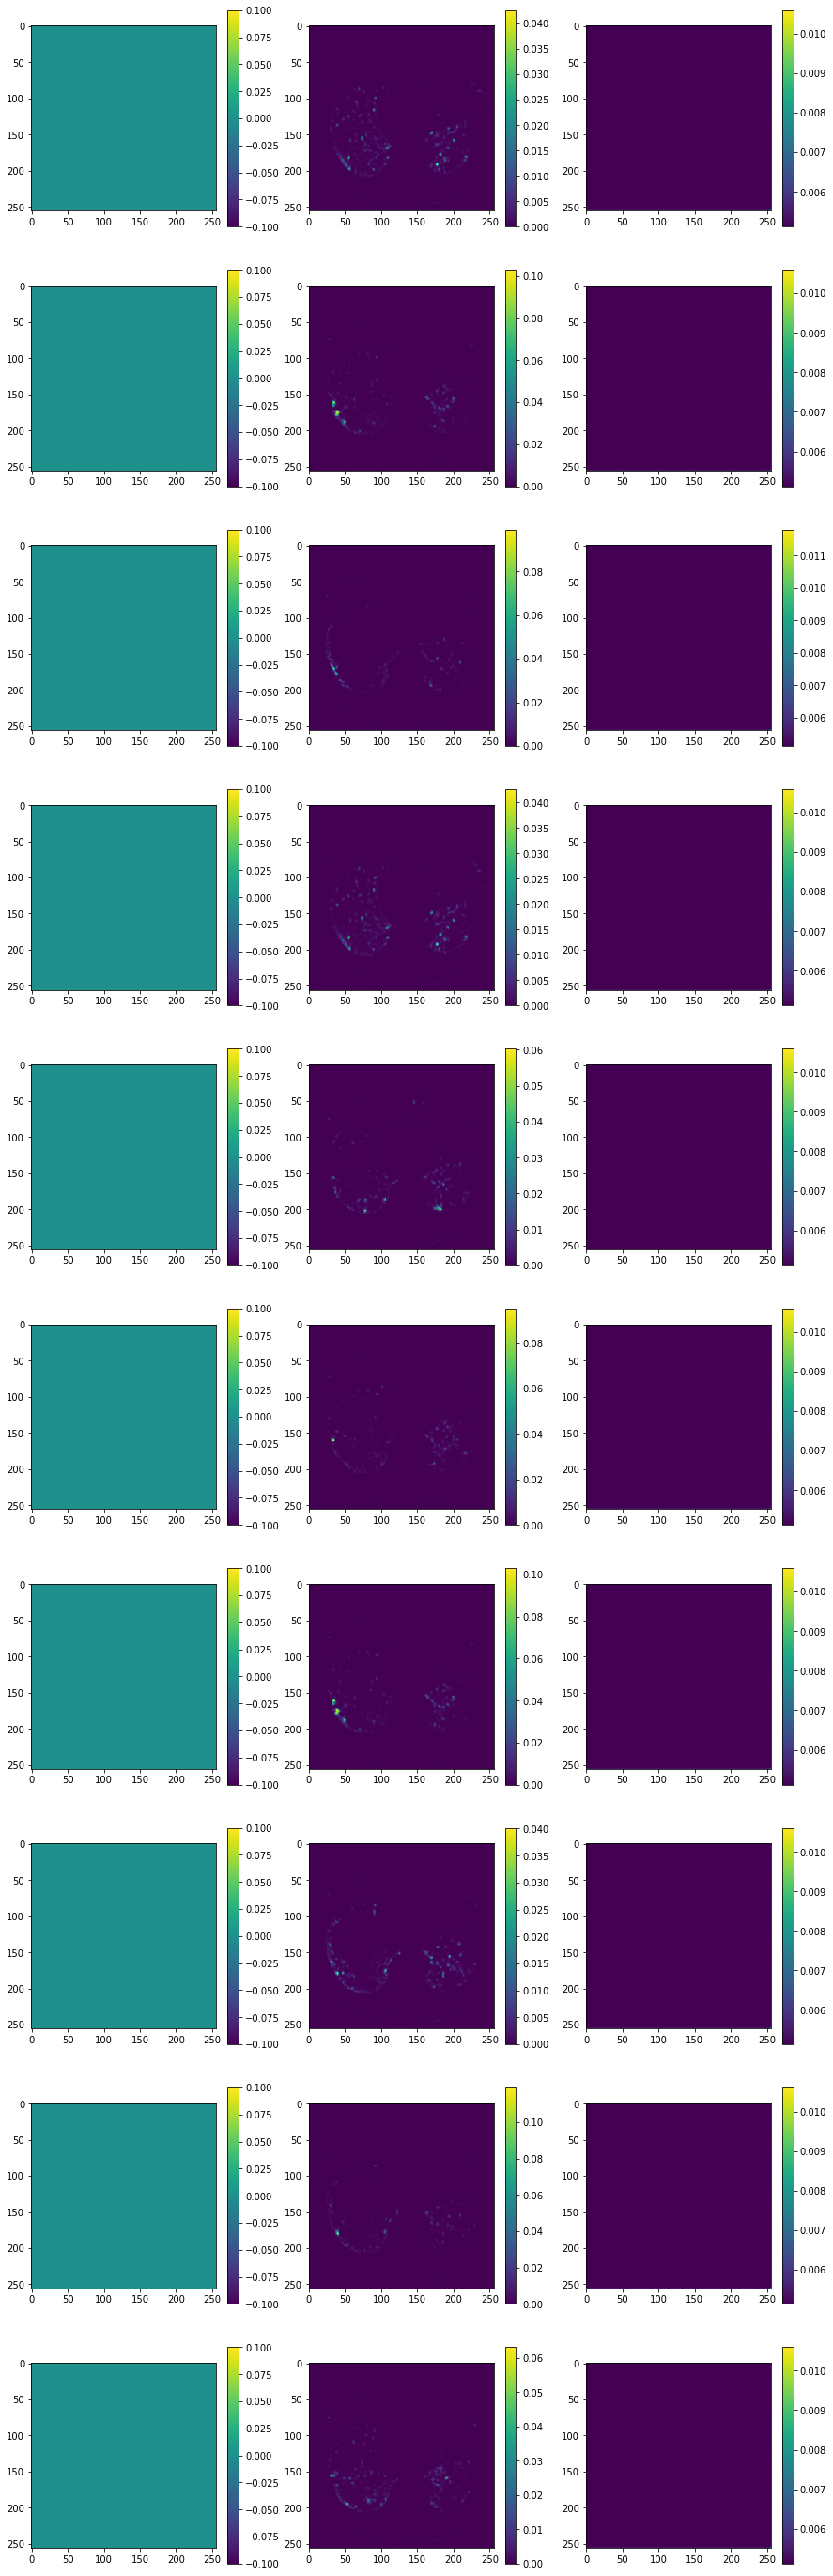

In [28]:
fig, ax = plt.subplots(10,3, figsize = (3*5,10*5))
for x in range(ax.shape[0]):
    z_slice = np.random.random_integers(0,high=X.shape[1]-1)
    a = ax[x,0].imshow(y[0,z_slice,:,:,0]) # ground truth
    fig.colorbar(a, ax=ax[x,0])
    b = ax[x,1].imshow(preds_unet[0,z_slice,:,:,0]) # unet pred
    fig.colorbar(b, ax=ax[x,1])
    c = ax[x,2].imshow(preds_lstm[0,z_slice,:,:,0]) # lstm pred
    fig.colorbar(c, ax=ax[x,2])

Loading dicom files ... This may take a moment.


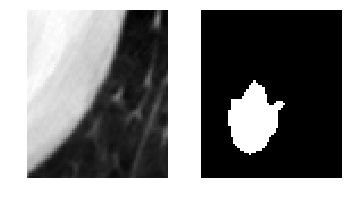

In [44]:
ann = scans[23].annotations[0]
#ann = pl.query(pl.Annotation).first()
vol = ann.scan.to_volume()

# padding = [(30,10), (10,25), (0,0)]

# mask = ann.boolean_mask(pad=padding)
# bbox = ann.bbox(pad=padding)

fig,ax = plt.subplots(1,2,figsize=(5,3))

ax[0].imshow(vol[bbox][:,:,2], cmap=plt.cm.gray)
ax[0].axis('off')

ax[1].imshow(mask[:,:,2], cmap=plt.cm.gray)
ax[1].axis('off')

plt.tight_layout()
plt.show()
plt.savefig("mask_bbox.png", bbox_inches="tight")

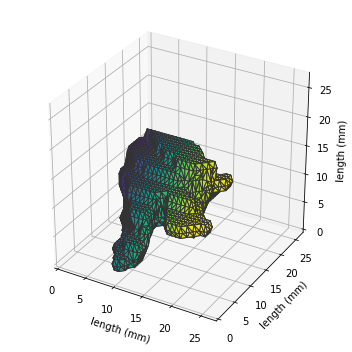

In [41]:
ann = pl.query(pl.Annotation).filter(pl.Annotation.lobulation == 5).first()
ann.visualize_in_3d()

Loading dicom files ... This may take a moment.


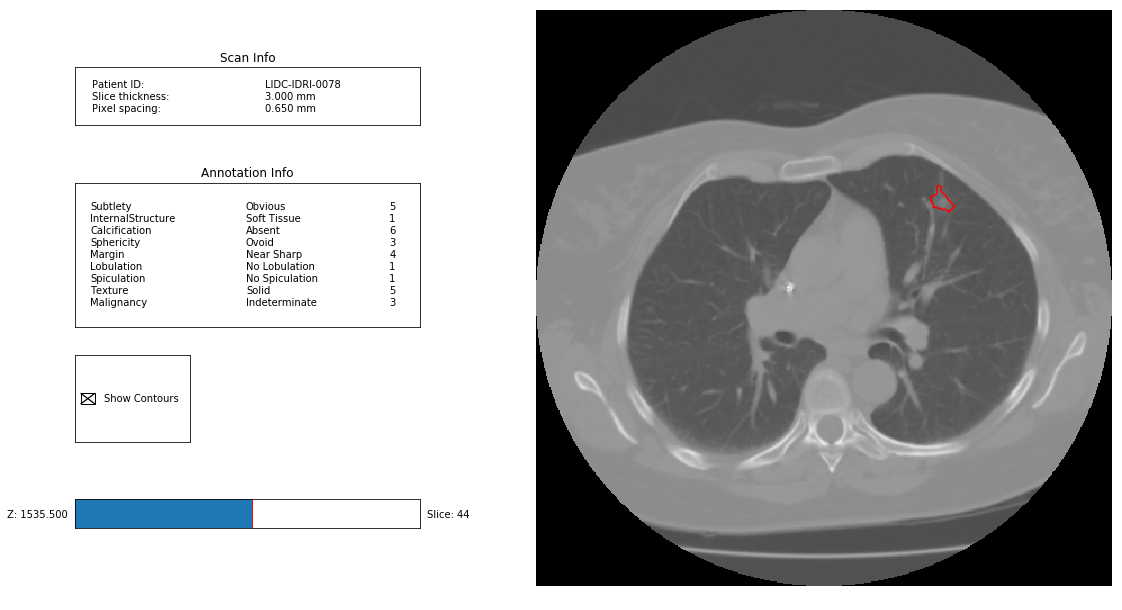

In [50]:
#ann = pl.query(pl.Annotation).first()
#ann = scans[23].annotations[5]
ann1.visualize_in_scan()